In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

colors = ['blue', 'red']

In [3]:
df = pd.read_csv('dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

In [4]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


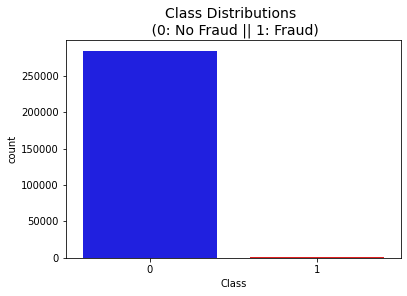

In [5]:
sns.countplot('Class', data=df, palette=['blue','red'])
_ = plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

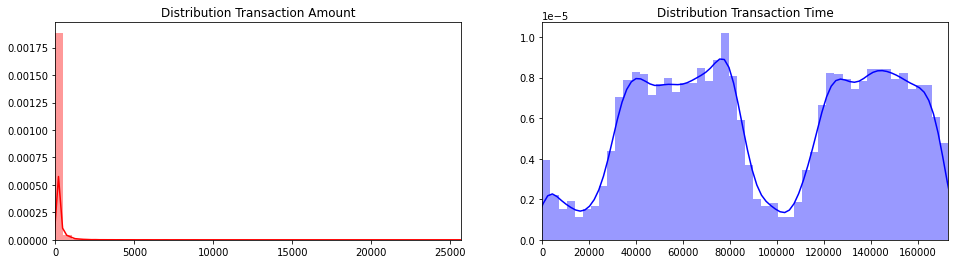

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='red')
_ = ax[0].set(title = 'Distribution Transaction Amount', xlim = ([min(amount_val), max(amount_val)]))

sns.distplot(time_val, ax=ax[1], color='blue')
_= ax[1].set(title = 'Distribution Transaction Time', xlim = ([min(time_val), max(time_val)]))

In [7]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


## Scaling 

In [8]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis=1)

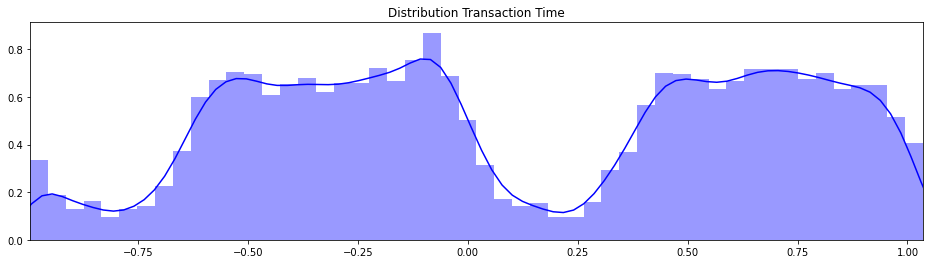

In [9]:
fig, ax = plt.subplots(figsize=(16,4))
time_val = df['scaled_time'].values
sns.distplot(time_val, ax=ax, color='blue')
_= ax.set(title = 'Distribution Transaction Time', xlim = ([min(time_val), max(time_val)]))

## Splitting the Data

In [10]:
from helper_functions.preprocessing import stratifief_split

X_train : (227845, 30) ,y_train shape: (227845,),                    X_test shape: (56962, 30), y_test shape: (56962,)
X_train : (227845, 30) ,y_train shape: (227845,),                    X_test shape: (56962, 30), y_test shape: (56962,)
X_train : (227846, 30) ,y_train shape: (227846,),                    X_test shape: (56961, 30), y_test shape: (56961,)
X_train : (227846, 30) ,y_train shape: (227846,),                    X_test shape: (56961, 30), y_test shape: (56961,)
X_train : (227846, 30) ,y_train shape: (227846,),                    X_test shape: (56961, 30), y_test shape: (56961,)


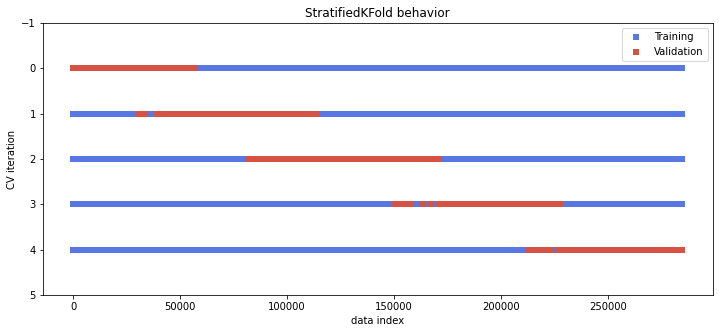

In [11]:
skf, X, y, X_train, y_train, X_test, y_test, train_index, test_index = stratifief_split(df=df, target_column='Class', splits = 5, 
                 plot_tscv=True)

In [12]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


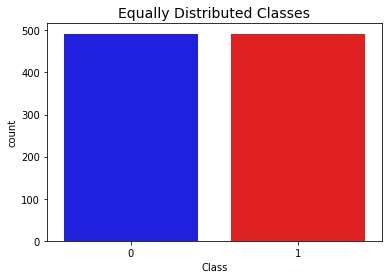

In [13]:
# shuffle data before creating the subsamples
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=['blue', 'red'])
_ = plt.title('Equally Distributed Classes', fontsize=14)

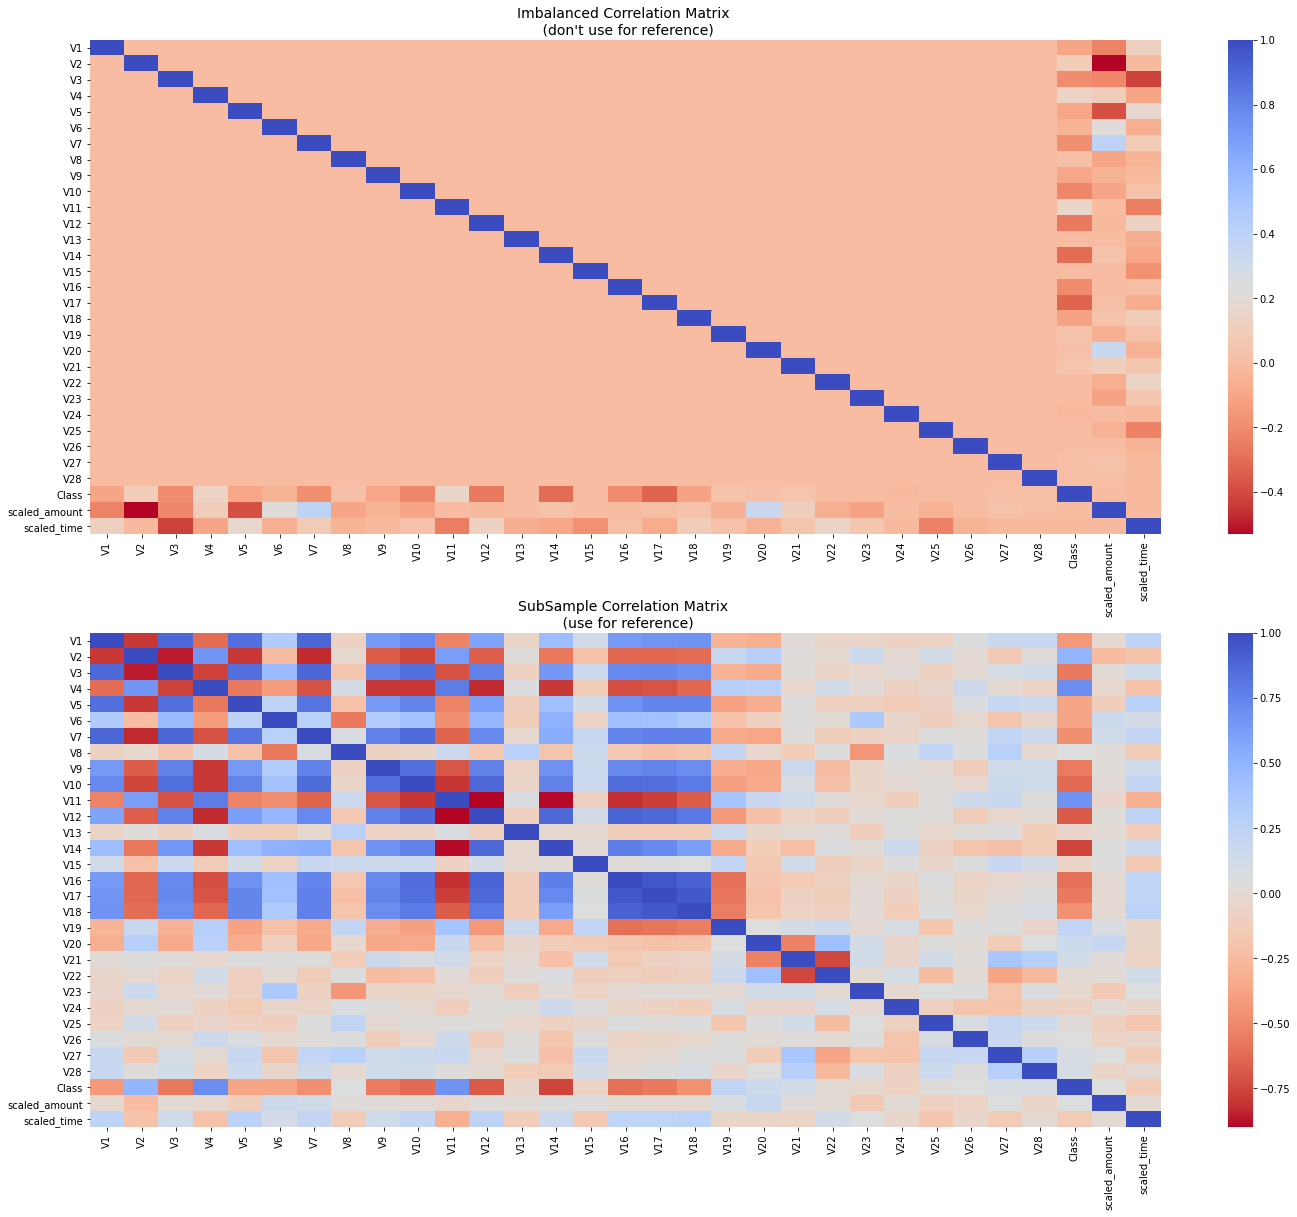

In [15]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

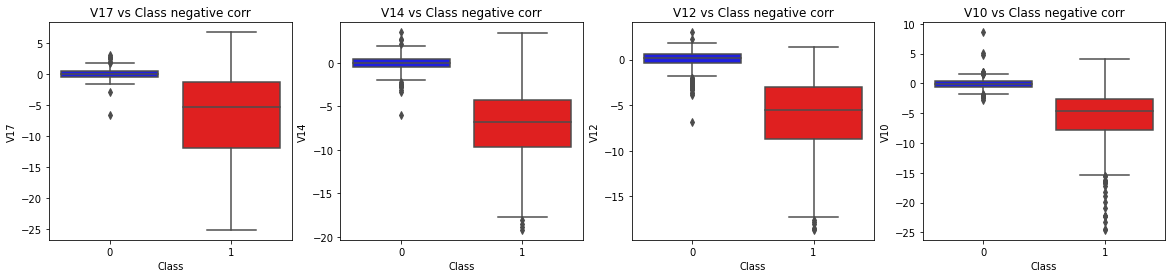

In [35]:
neg_y = ['V17', 'V14', 'V12', 'V10']
f, ax = plt.subplots(1,4, figsize=(20,4))
for i, y_ in enumerate(neg_y):
    sns.boxplot(x='Class', y=y_, data=new_df, palette=colors, ax=ax[i])
    ax[i].set(title = f"{y_} vs Class negative corr")

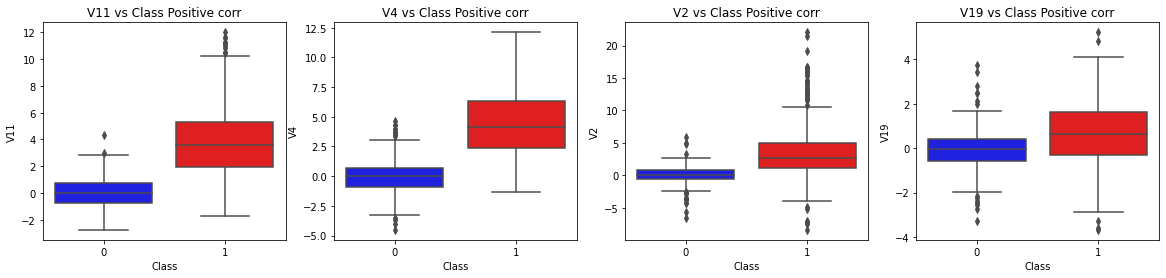

In [36]:
pos_y = ['V11', 'V4', 'V2', 'V19']
f, ax = plt.subplots(1,4, figsize=(20,4))
for i, y_ in enumerate(pos_y):
    sns.boxplot(x='Class', y=y_, data=new_df, palette=colors, ax=ax[i])
    ax[i].set(title = f"{y_} vs Class Positive corr")

## Anomaly Detection

remove "extreme outliers" from features that have a high correlation with our classes

 - Visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. 
 - Determining the threshold: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).
 - Conditional Dropping: Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.
 
 - Boxplot Representation: Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.

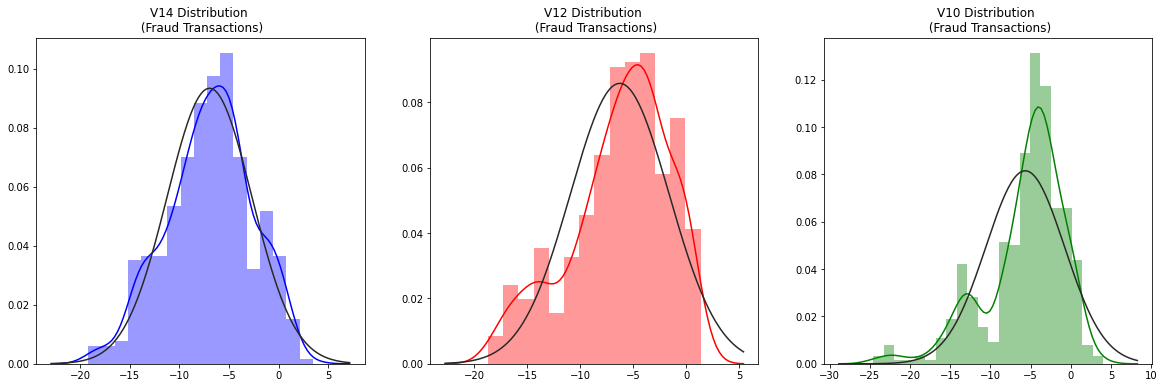

In [41]:
from scipy.stats import norm
f, ax = plt.subplots(1,3, figsize=(20, 6))
f_list = ['V14', 'V12', 'V10']
colors = ['blue', 'red', 'green']

for i, f in enumerate(f_list):
    fraud_dist = new_df[f].loc[new_df['Class'] == 1].values
    sns.distplot(fraud_dist,ax=ax[i], fit=norm, color=colors[i])
    ax[i].set(title = f'{f} Distribution \n (Fraud Transactions)')